#  Homework 3 (HW3)

Deadline: April 3rd Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW3/1)

In this exercise we  predict the quality of different wines! Can a winemaker predict whether his wine will be considered a good quality wine by the jury based on it's chemical properties only? 🍷 (50%)

**a)** We will work using the data available at the [UCI dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). It  contains data on 11 chemical properties (e.g. sugar content, pH, alcohol content, etc.) of thousands of north-Portugalian wines. Each wine has a quality-score on a scale of 10. 

* Import the **Red** wine data into a pandas dataframe from the [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (You can import the data directly from the web page, without dowloading it to your computer!) The *quality* column will be the target variable, the rest will be the features. 
* This will be a binary classification problem, hence, redefine the target variable in the following way: let it be 0 if the *quality < 7* (bad wines) and let it be 1 if *quality $\geq$ 7* (good wines). Create separate *numpy arrays* to store the target and the rest of the attributes!  


In [111]:
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

y_true = data['quality'] < 7

data.drop(['quality'], axis=1, inplace=True)

**b)** Classification, cross validation
* Perform a classification using the kNN algorithm! Using the 10-fold cross validation technique determine for what *k* value will the classifier's F-score be optimal! (Analyze values of *k* in a reasonable interval!) <br>
Present the boxplot of the obtained F-scores (the boxplot of 10 F-scores for each *k* values) against *k*!  <br>
(Hint: use the *model_selection.cross_val_score* function and set *scoring = 'f1'*!) 
<br>
(Hint2: use the boxplot function from the *seaborn* package!)


<AxesSubplot:>

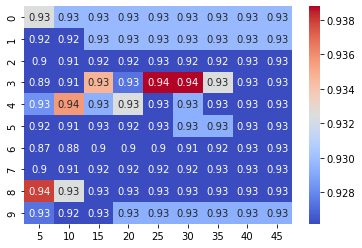

In [112]:
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import seaborn as sns

k_values = range(5, 50, 5)
cross_vals=10

scores = pd.DataFrame(columns=k_values, index = range(cross_vals))

for k_value in k_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_value)
    score = cross_val_score(clf, data, y_true, cv=cross_vals, scoring='f1')
    scores[k_value] = score

# looks like 30 neighbors is optimal
sns.heatmap(scores, annot=True, cmap='coolwarm', vmin=np.percentile(scores, 50))

**c)** Now solve the classification problem using a decision tree! Repeat the analysis of part b), but now, let the examined parameter be the tree's maximum depth!

<AxesSubplot:>

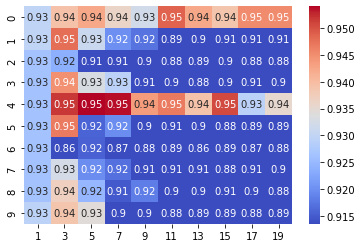

In [118]:
from sklearn import tree

depth = range(1, 20, 2)
cross_vals = 10

scores = pd.DataFrame(columns=depth, index = range(cross_vals))

for d in depth:
	clf = tree.DecisionTreeClassifier(max_depth=d)
	score = cross_val_score(clf, data, y_true, cv=cross_vals, scoring='f1')
	scores[d] = score

# looks like depth of 3 is optimal
sns.heatmap(scores, annot=True, cmap='coolwarm', vmin=np.percentile(scores, 50))

---

## Exercise 2 (HW3/2)

Using predictive analytics methods, we would like to identify first-year college students at risk of dropping out and academic failure. <span style="color:red">Write a one-page long essay covering the following points!</span> (50%) If you would prefer, you can write an essay about a data science research question of your choice.

**a)** Design the analysis, think through the stages of the analysis following CRISP-DM methodology! How can you state the problem as a data science problem? What machine learning approaches could be used here? (See Lecture 02!) 

**b)** Do you think that the requirements of a successful data science projects are met? Go through the 7 requirements that we have covered in class! (See Lecture 02!) 

**c)** What ethical questions are raised in this project? Mention utilizations that you think are useful and ethical and give examples of bad applications as well!
